<a href="https://colab.research.google.com/github/soobh2341/soobh2341/blob/main/Capstone_Intel_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"soiboi2341","key":"d38a5c585b458b2f4a2e3cf340292fa4"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                               title                                                   size  lastUpdated                 downloadCount  voteCount  usabilityRating  
----------------------------------------------------------------  ------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
abdulmalik1518/cars-datasets-2025                                 Cars Datasets (2025)                                   25987  2025-07-17 21:43:28.493000           4308         96  1.0              
sahilislam007/college-student-placement-factors-dataset           College Student Placement Factors Dataset             110450  2025-07-02 08:33:50.547000           7715        161  1.0              
urvishahir/electric-vehicle-specifications-dataset-2025           Electric Vehicle Specs Dataset (2025)🔋🚗                16631  2025-06-20 07:14:56.777000          10871        261  1.0              


In [ ]:
!kaggle datasets download -d puneet6060/intel-image-classification

Dataset URL: https://www.kaggle.com/datasets/puneet6060/intel-image-classification
License(s): copyright-authors
 95% 329M/346M [00:05<00:00, 43.1MB/s]
100% 346M/346M [00:05<00:00, 63.8MB/s]


In [ ]:
import zipfile

with zipfile.ZipFile("intel-image-classification.zip", 'r') as zip_ref:
    zip_ref.extractall("intel_data")


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import os


In [ ]:
# Check contents of the main folder
for root, dirs, files in os.walk("intel_data"):
    print(f"📂 {root}")
    for d in dirs:
        print(f"  └── 📁 {d}")
    for f in files:
        print(f"  └── 📄 {f}")

📂 intel_data
  └── 📁 seg_pred
  └── 📁 seg_train
  └── 📁 seg_test
📂 intel_data/seg_pred
  └── 📁 seg_pred
📂 intel_data/seg_pred/seg_pred
  └── 📄 15116.jpg
  └── 📄 7068.jpg
  └── 📄 23607.jpg
  └── 📄 839.jpg
  └── 📄 17440.jpg
  └── 📄 13468.jpg
  └── 📄 14065.jpg
  └── 📄 22148.jpg
  └── 📄 9618.jpg
  └── 📄 2860.jpg
  └── 📄 6647.jpg
  └── 📄 21532.jpg
  └── 📄 1581.jpg
  └── 📄 15391.jpg
  └── 📄 23425.jpg
  └── 📄 21166.jpg
  └── 📄 13768.jpg
  └── 📄 21809.jpg
  └── 📄 14006.jpg
  └── 📄 11240.jpg
  └── 📄 11607.jpg
  └── 📄 9162.jpg
  └── 📄 22979.jpg
  └── 📄 6062.jpg
  └── 📄 4657.jpg
  └── 📄 21888.jpg
  └── 📄 23099.jpg
  └── 📄 319.jpg
  └── 📄 7242.jpg
  └── 📄 1125.jpg
  └── 📄 17003.jpg
  └── 📄 20023.jpg
  └── 📄 806.jpg
  └── 📄 11386.jpg
  └── 📄 5645.jpg
  └── 📄 2151.jpg
  └── 📄 15123.jpg
  └── 📄 4758.jpg
  └── 📄 19008.jpg
  └── 📄 4207.jpg
  └── 📄 3164.jpg
  └── 📄 1276.jpg
  └── 📄 19596.jpg
  └── 📄 20715.jpg
  └── 📄 23372.jpg
  └── 📄 15933.jpg
  └── 📄 22244.jpg
  └── 📄 14498.jpg
  └── 📄 5491.jpg
  └── 

In [ ]:
# Paths
train_dir = 'intel_data/seg_train/seg_train'
test_dir = 'intel_data/seg_test/seg_test'
img_height, img_width = 150, 150
batch_size = 32

# Data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 11230 images belonging to 6 classes.
Found 2804 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [ ]:
#Build and Compile CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(6, activation='softmax')  # 6 classes
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,829,126 (18.42 MB)

 Trainable params: 4,829,126 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)



/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 620s 2s/step - accuracy: 0.4602 - loss: 1.3438 - val_accuracy: 0.6558 - val_loss: 0.9454
Epoch 2/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 618s 2s/step - accuracy: 0.6464 - loss: 0.9357 - val_accuracy: 0.7311 - val_loss: 0.7436
Epoch 3/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 620s 2s/step - accuracy: 0.6839 - loss: 0.8298 - val_accuracy: 0.7486 - val_loss: 0.6829
Epoch 4/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 615s 2s/step - accuracy: 0.7393 - loss: 0.7402 - val_accuracy: 0.7618 - val_loss: 0.6523
Epoch 5/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 646s 2s/step - accuracy: 0.7504 - loss: 0.6924 - val_accuracy: 0.7564 - val_loss: 0.6776
Epoch 6/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 607s 2s/step - accuracy: 0.7625 - loss: 0.6394 - val_accuracy: 0.7757 - val_loss: 0.6075
Epoch 7/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 615s 2s/step - accuracy: 0.7867 - loss: 0.6090 - val_accuracy: 0.7967 - val_loss: 0.5534
Epoch 8/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 651s 2s/step - accuracy: 0.7932 - loss: 0.5943 - val_accu

In [ ]:
# Evaluate model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"\n✅ Test Accuracy: {test_accuracy:.4f}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 45s 473ms/step - accuracy: 0.8319 - loss: 0.4734

✅ Test Accuracy: 0.8433


In [ ]:
# Predict labels
y_pred_probs = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

94/94 ━━━━━━━━━━━━━━━━━━━━ 41s 439ms/step


In [ ]:
# Classification report
report = classification_report(y_true, y_pred_classes, target_names=class_labels)
print("\nClassification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

   buildings       0.84      0.80      0.82       437
      forest       0.96      0.97      0.96       474
     glacier       0.85      0.76      0.80       553
    mountain       0.78      0.77      0.78       525
         sea       0.85      0.85      0.85       510
      street       0.80      0.92      0.86       501

    accuracy                           0.84      3000
   macro avg       0.85      0.85      0.84      3000
weighted avg       0.84      0.84      0.84      3000



In [ ]:
# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

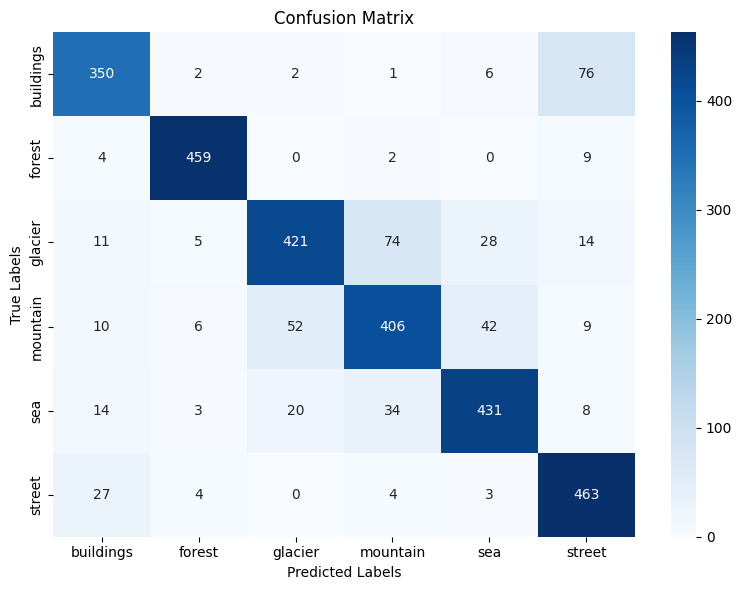

In [ ]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.tight_layout()
plt.show()

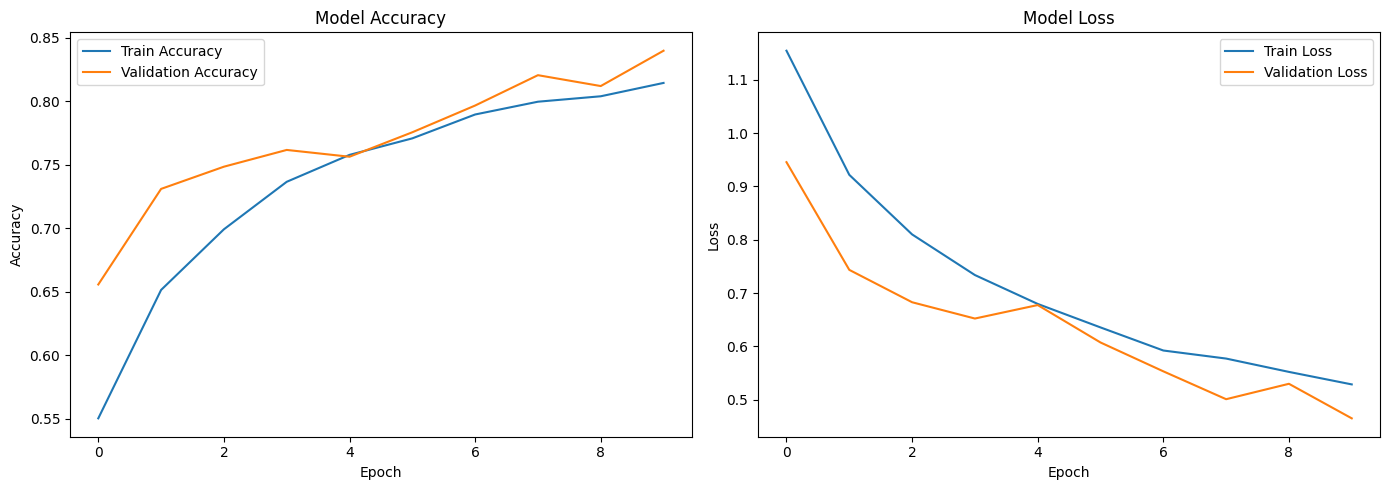

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy and loss curves
plt.figure(figsize=(14, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Display plots
plt.tight_layout()
plt.show()


In [ ]:
model.save("intel_scene_classifier.h5")



In [ ]:
from tensorflow.keras.models import load_model
model = load_model("intel_scene_classifier.h5")


In [ ]:
# Filepaths of test images
filenames = test_generator.filepaths

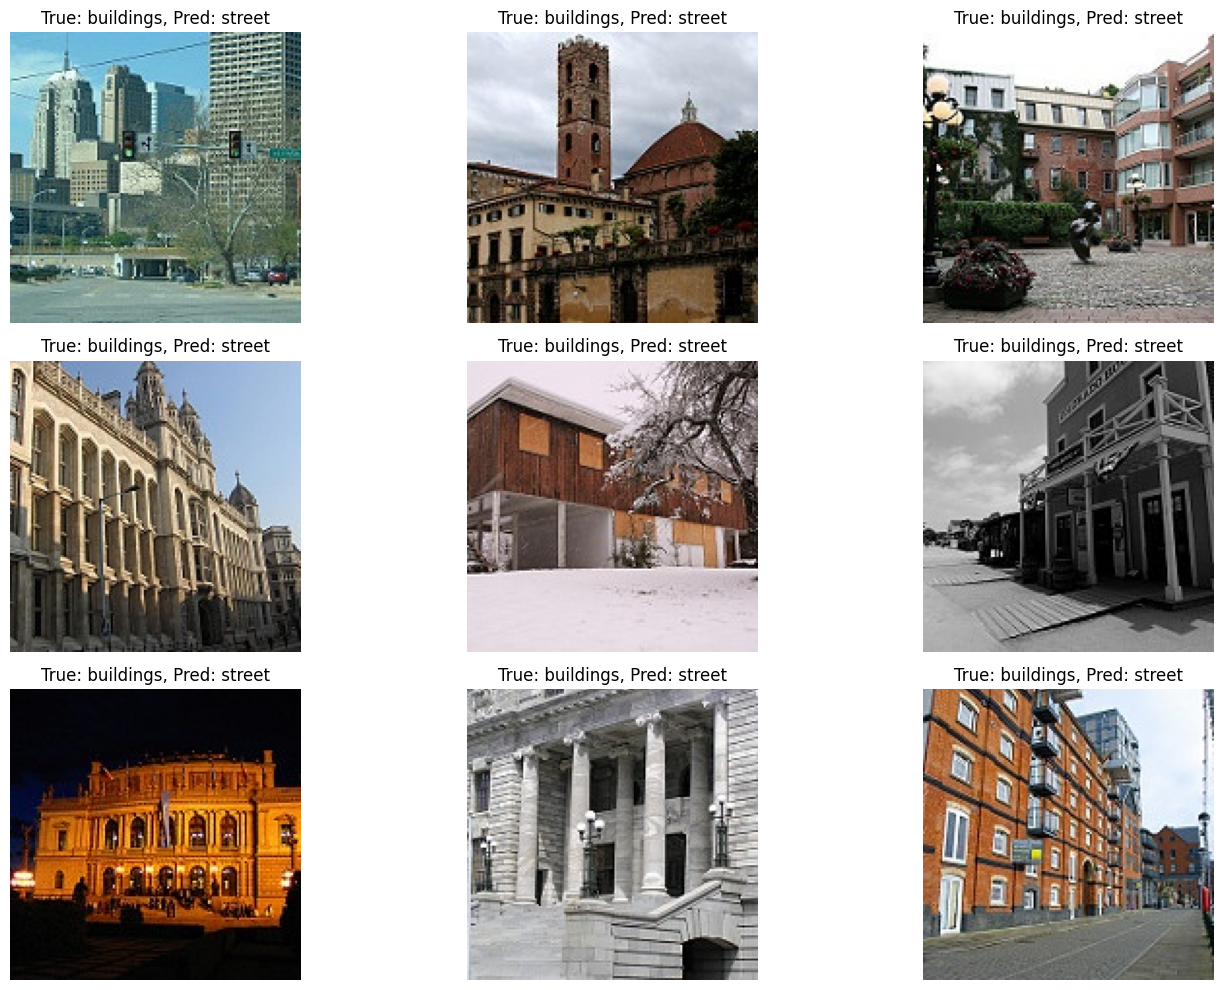

In [ ]:
# Display a few misclassified images
misclassified = np.where(y_pred_classes != y_true)[0]

plt.figure(figsize=(15, 10))
for i, idx in enumerate(misclassified[:9]):
    img = plt.imread(filenames[idx])
    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.title(f"True: {class_labels[y_true[idx]]}, Pred: {class_labels[y_pred_classes[idx]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()